# StyleGAN2Ada Experiments

From:

- https://github.com/NVlabs/stylegan2-ada-pytorch


In [8]:
!~\AppData\Local\Programs\Python\Python39\python.exe ./../train.py --outdir=./data/output --data=./data/256image --subset 1 --gpus=1

The system cannot find the path specified.


In [2]:
# !cd ../latent-stylegan2-ada-pytorch
# # !git pull
# !python ./train.py --outdir=/data/imagefolder/stylegan2/output/2 --data=/data/ffhq/images256x256 --subset 100 --gpus=4

Already up to date.


In [2]:
# import numpy as np
# arr = np.array([1,2,3,4])

# np.expand_dims(arr, 0)

array([[1, 2, 3, 4]])

In [27]:
!ls -l /data/imagefolder/stylegan2/output/5/

total 0
drwxrwxr-x 2 will will 4096 Jul 27 14:20 00000-images256x256-auto4-batch128
drwxrwxr-x 2 will will 4096 Jul 27 14:27 00001-images256x256-auto4-batch128


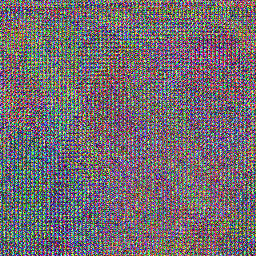

In [16]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/5/00001-images256x256-auto4-batch128/fakes000000.png'

Image.open(path)

In [7]:
import numpy as np

arr = np.asarray(Image.open(path))
print(arr[0].max(), arr[0].min())

246 196


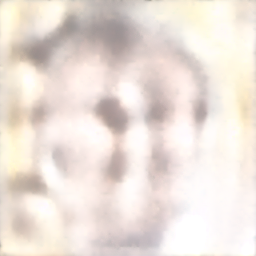

In [3]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/3/00012-images256x256-subset10-auto4/fakes000241.png'

Image.open(path)

In [1]:
class Wrapper():

    def __init__(self, iterator):
        self.iterator = iterator

    def __iter__(self):
        return self

    def __next__(self):
        elem = next(self.iterator)
        return elem

In [4]:
data = [1,2,3,4,5]
iterator = iter(data)

wrapper = Wrapper(iterator)

next(wrapper)

1

In [1]:
import torch

isinstance(torch.FloatTensor([2,3,4,5]), torch.Tensor)

True

In [33]:
import numpy as np

ngpus = 4
rank = 3

arr = np.array([1,2,3,4,5,6,7,8])

block = len(arr) // ngpus
start = rank * block
end = start + block
end = block * (ngpus - rank - 1)
arr[rank * block: -end if end > 0 else None]

array([7, 8])

In [37]:
range(0, 10)[9]

9

In [ ]:
random.randint(1,255)

In [5]:
[2, *[2,2,2]]

[2, 2, 2, 2]

In [2]:
import torch 
import random

torch.randint(1, 256, (16, 3, 256, 256)) 

tensor([[[[206,  31, 242,  ..., 184,  25, 130],
          [ 48, 213,  92,  ...,  60, 185, 115],
          [ 85, 112,  46,  ...,  83, 122, 252],
          ...,
          [ 67, 251, 239,  ...,   3,  82, 159],
          [131, 107, 177,  ..., 202, 204,  84],
          [129,  65,  81,  ...,  45, 113,  62]],

         [[  2, 248, 190,  ..., 241, 231,  21],
          [  6, 165, 129,  ..., 121, 107, 171],
          [ 82,   8,  74,  ...,  53, 225,   4],
          ...,
          [127, 243, 212,  ..., 119, 196, 239],
          [101, 212, 130,  ..., 221, 245, 237],
          [209,  44, 119,  ..., 147, 232,  28]],

         [[ 49, 230,  51,  ..., 134,  77, 181],
          [ 28,  12, 196,  ..., 101, 245,   5],
          [216,  93, 213,  ..., 251, 179,  79],
          ...,
          [118, 213,  82,  ...,  12,  30,  59],
          [135, 137, 232,  ..., 230,  33,  47],
          [207,  72,  95,  ...,  88,  38, 118]]],


        [[[171,  63, 112,  ..., 141, 216, 244],
          [231,  54, 129,  ...,   4

In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as dset

IMAGE_DIR = "/data/imagefolder/ffhq"
OUTPUT_DIR = "/data/imagefolder/latent/klf4/64"
IMAGE_SIZE = 64
WORKERS = 2
BATCH_SIZE = 128

dataset = dset.ImageFolder(root=IMAGE_DIR,
                           transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Resize(IMAGE_SIZE),
                                transforms.CenterCrop(IMAGE_SIZE),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                           ]))  


In [4]:
dataset[0][0].shape[1]

64

In [1]:
import torch

img = torch.randint(1, 255 + 1, (16, 3, 256, 256)).type(torch.FloatTensor)

In [5]:
img.permute(0, 2, 3, 1).shape

torch.Size([16, 256, 256, 3])

In [13]:
os.listdir(".")

['data', 'sample.ipynb']

In [16]:
import re
re.find(r'\d+', 'latent_96.npy')

AttributeError: module 're' has no attribute 'find'

In [7]:
int("".join(list(filter(str.isdigit, "awfwfw2332312adffwfaw"))))

2332312

In [12]:
list(map(lambda path : int(path), os.listdir(".")))

ValueError: invalid literal for int() with base 10: 'data'

In [ ]:
li = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1,1,1,1,1,1,1,1,1,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, None]
ite = iter(li)
it = iter(lambda *args: next(ite), None)
while True:
    print(next(it))

In [21]:
class InfiniteSampler(torch.utils.data.Sampler):
    def __init__(self, dataset, rank=0, num_replicas=1, shuffle=True, seed=0, window_size=0.5):
        assert len(dataset) > 0
        assert num_replicas > 0
        assert 0 <= rank < num_replicas
        assert 0 <= window_size <= 1
        super().__init__(dataset)
        self.dataset = dataset
        self.rank = rank
        self.num_replicas = num_replicas
        self.shuffle = shuffle
        self.seed = seed
        self.window_size = window_size

    def __iter__(self):
        order = np.arange(len(self.dataset))
        rnd = None
        window = 0
        if self.shuffle:
            rnd = np.random.RandomState(self.seed)
            rnd.shuffle(order)
            window = int(np.rint(order.size * self.window_size))

        idx = 0
        while True:
            i = idx % order.size
            if idx % self.num_replicas == self.rank:
                yield order[i]
            if window >= 2:
                j = (i - rnd.randint(window)) % order.size
                order[i], order[j] = order[j], order[i]
            idx += 1

In [23]:
import torch
import numpy as np

li = [1,2,3,4]

class Simp:
    def __init__(self):
        print("")

    def __iter__(self):
        return self
    def __len__(self):
        return 4

simp = InfiniteSampler(li)

it = iter(torch.utils.data.DataLoader(dataset=li, batch_size=1, sampler=simp))

while True:
    next(it)

KeyboardInterrupt: 